In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collinearity import SelectNonCollinear


# Data Importing and Pre-processing
## Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

Dimension: We have 21 columns in this dataset which includes: id, date, price, bathrooms, sqft_living, sqft_lot, floors,	waterfront,	view, condition, grade,	sqft_above,	sqft_basement,	yr_built, yr_renovated,	zipcode	lat	long, sqft_living15, and sqft_lot15.

File Type: CSV file (house_sales).

Import Method: Imported the file using pandas.



In [2]:
df=pd.read_csv('house_sales.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Changing the dataset's date format, and add a year and month column: 

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d %b %Y')
print (df)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1      6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2      5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3      2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4      1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0       3.0       2.50       1530.0   
21609  6600060120 2015-02-23  400000.0       4.0       2.50       2310.0   
21610  1523300141 2014-06-23  402101.0       2.0       0.75       1020.0   
21611   291310100 2015-01-16  400000.0       3.0       2.50       1600.0   
21612  1523300157 2014-10-15  325000.0       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0        5650.0   

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
print(df)


               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1      6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2      5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3      2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4      1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0       3.0       2.50       1530.0   
21609  6600060120 2015-02-23  400000.0       4.0       2.50       2310.0   
21610  1523300141 2014-06-23  402101.0       2.0       0.75       1020.0   
21611   291310100 2015-01-16  400000.0       3.0       2.50       1600.0   
21612  1523300157 2014-10-15  325000.0       2.0       0.75       1020.0   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0        565

#  Data Types




In [8]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
month                     int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       20479 non-null  float64       
 4   bathrooms      20545 non-null  float64       
 5   sqft_living    20503 non-null  float64       
 6   sqft_lot       20569 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Counting the null values

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year                0
month               0
dtype: int64

## Clean, wrangle, and handle missing data


In [11]:
round(df.describe(),2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,21613.00,20479.00,20545.00,20503.00,20569.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2081.07,15179.82,1.49,0.01,0.23,3.41,...,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32,6.57
std,2.876566e+09,367127.20,0.93,0.77,915.04,41486.17,0.54,0.09,0.77,0.65,...,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47,3.12
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00,1.00
25%,2.123049e+09,321950.00,3.00,1.50,1430.00,5040.00,1.00,0.00,0.00,3.00,...,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00,4.00
50%,3.904930e+09,450000.00,3.00,2.25,1920.00,7620.00,1.50,0.00,0.00,3.00,...,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00,6.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10708.00,2.00,0.00,0.00,4.00,...,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00,9.00
max,9.900000e+09,7700000.00,33.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,...,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,2015.00,12.00


<AxesSubplot:xlabel='variable', ylabel='value'>

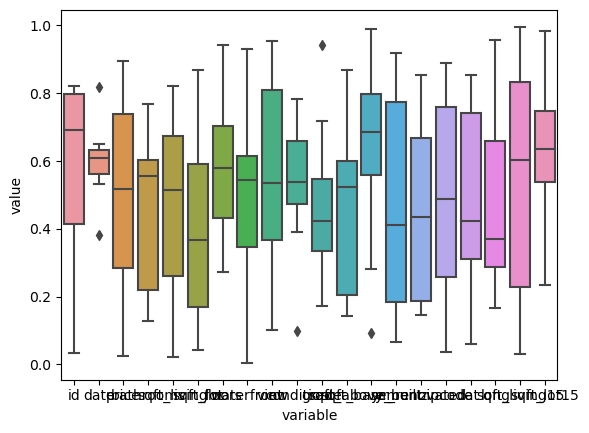

In [12]:
df_boxplot = pd.DataFrame(data = np.random.random(size=(8,20)), columns = ['id', 'date', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))


<AxesSubplot:xlabel='variable', ylabel='value'>

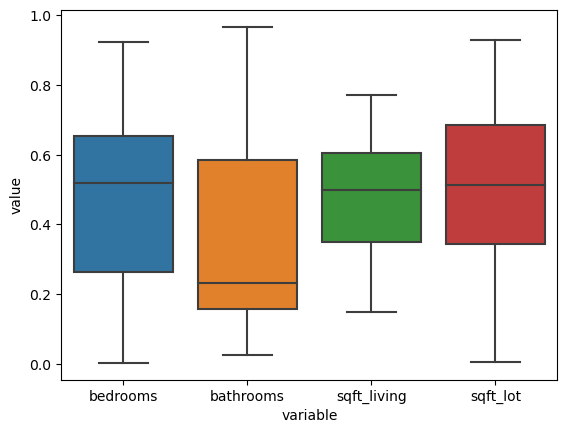

In [13]:
df_boxplot = pd.DataFrame(data = np.random.random(size=(10,4)), columns = ['bedrooms','bathrooms','sqft_living','sqft_lot'])
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))

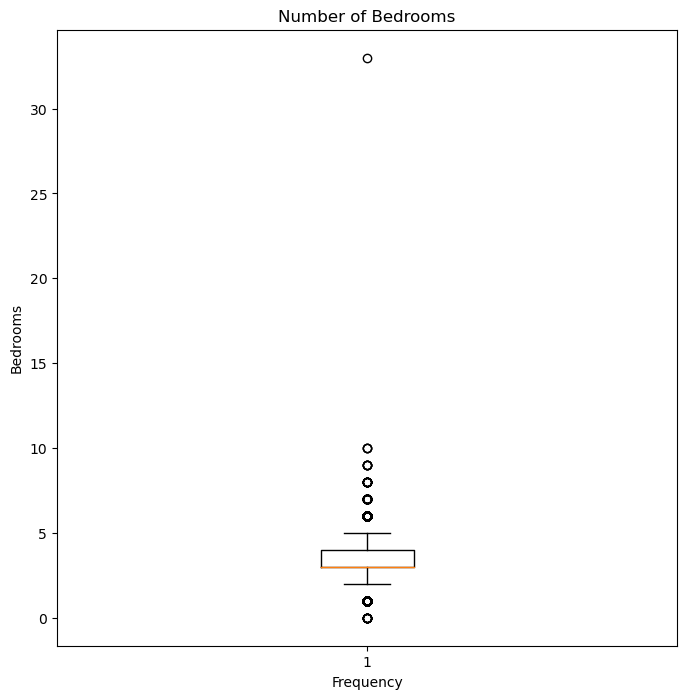

In [50]:
# Matplotlib
fig = plt.figure(figsize = (8,8))
plt.boxplot(df['bedrooms'])
plt.xlabel('Frequency')
plt.ylabel('Bedrooms')        
plt.title('Number of Bedrooms')
plt.show()

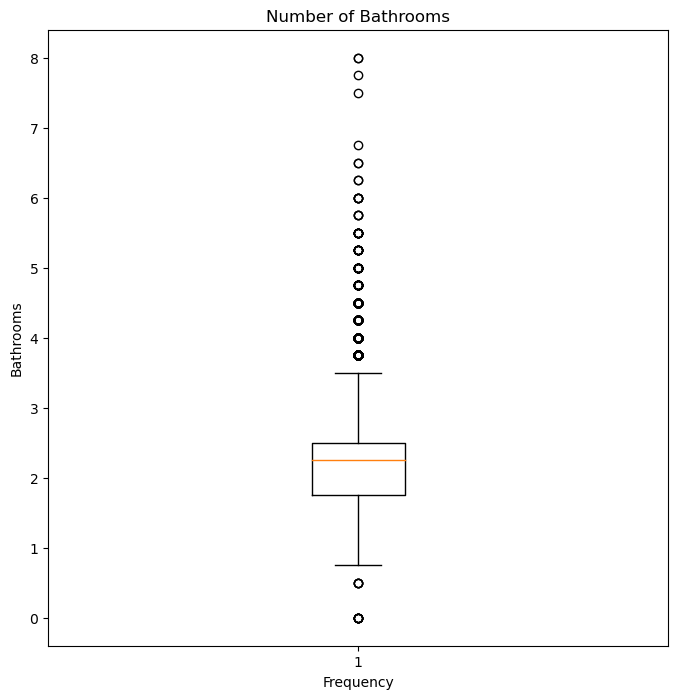

In [51]:
# Matplotlib
fig = plt.figure(figsize = (8,8))
plt.boxplot(df['bathrooms'])
plt.xlabel('Frequency')
plt.ylabel('Bathrooms')        
plt.title('Number of Bathrooms')
plt.show()

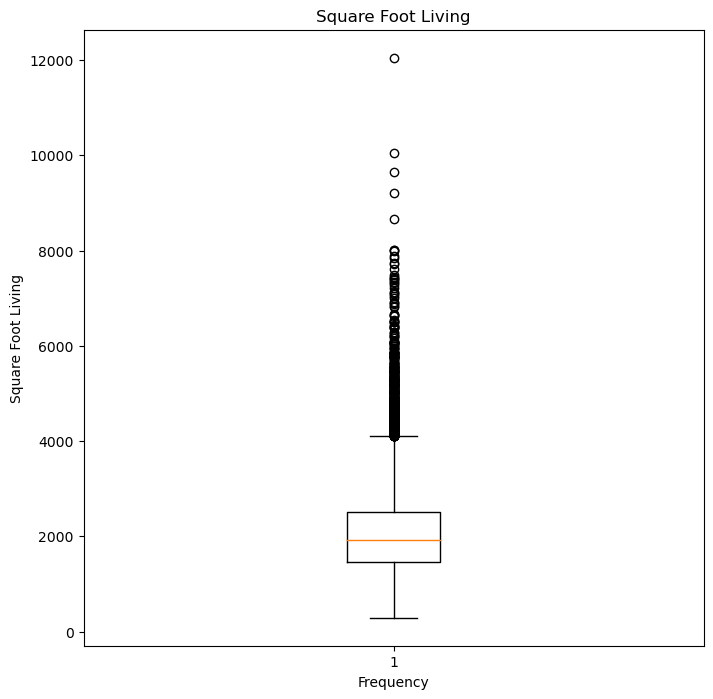

In [52]:
# Matplotlib
fig = plt.figure(figsize = (8,8))
plt.boxplot(df['sqft_living'])
plt.xlabel('Frequency')
plt.ylabel('Square Foot Living')        
plt.title('Square Foot Living')
plt.show()

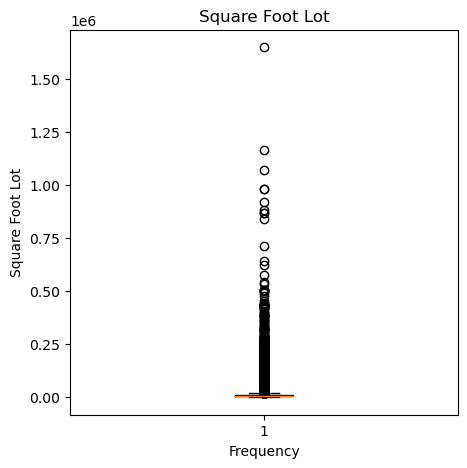

In [53]:
# Matplotlib
fig = plt.figure(figsize = (5,5))
plt.boxplot(df['sqft_lot'])
plt.xlabel('Frequency')
plt.ylabel('Square Foot Lot')        
plt.title('Square Foot Lot')
plt.show()

## Filling the null values

In [18]:
##Reasoning: We chose median to fill up the null values for bedrooms because of the existing outlier in the data set. Above table and boxplot will show the outliers.
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())



In [19]:
##Reasoning: We chose median to fill up the null values for bathrooms because of the existing outlier in the data set. Above table and boxplot will show the outliers.
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())



In [20]:
##Reasoning: We chose median to fill up the null values for sqft_living because of the existing outlier in the data set. Above table and boxplot will show the outliers.
df['sqft_living'] = df['sqft_living'].fillna(df['sqft_living'].median())



In [21]:
##Reasoning: We chose median to fill up the null values for sqft_lot because of the existing outliers. Above table and boxplot will show the outliers.
df['sqft_lot']= df['sqft_lot'].fillna(df['sqft_lot'].median())



## Recalculating the null values

In [22]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

## Transform data appropriately using techniques such as aggregation, normalization, and feature construction


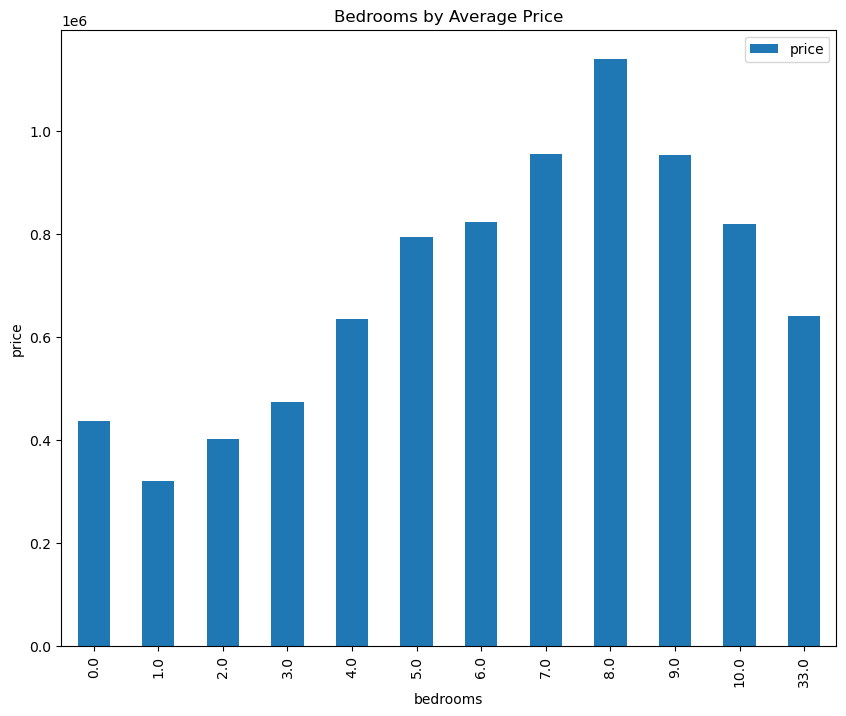

In [66]:
df_2=df.groupby("bedrooms", as_index = True)[["price"]].mean()
df_2.plot(kind='bar', figsize= (10,8))
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Bedrooms by Average Price')
plt.show()

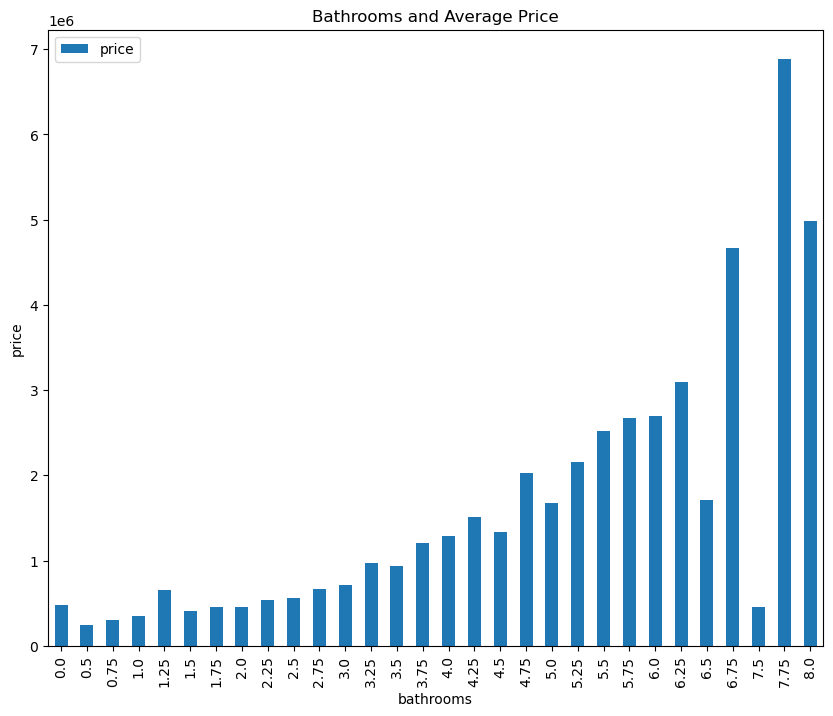

In [63]:
df_2=df.groupby("bathrooms", as_index = True)[["price"]].mean()
df_2.plot(kind='bar', figsize= (10,8))
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Bathrooms and Average Price')
plt.show()

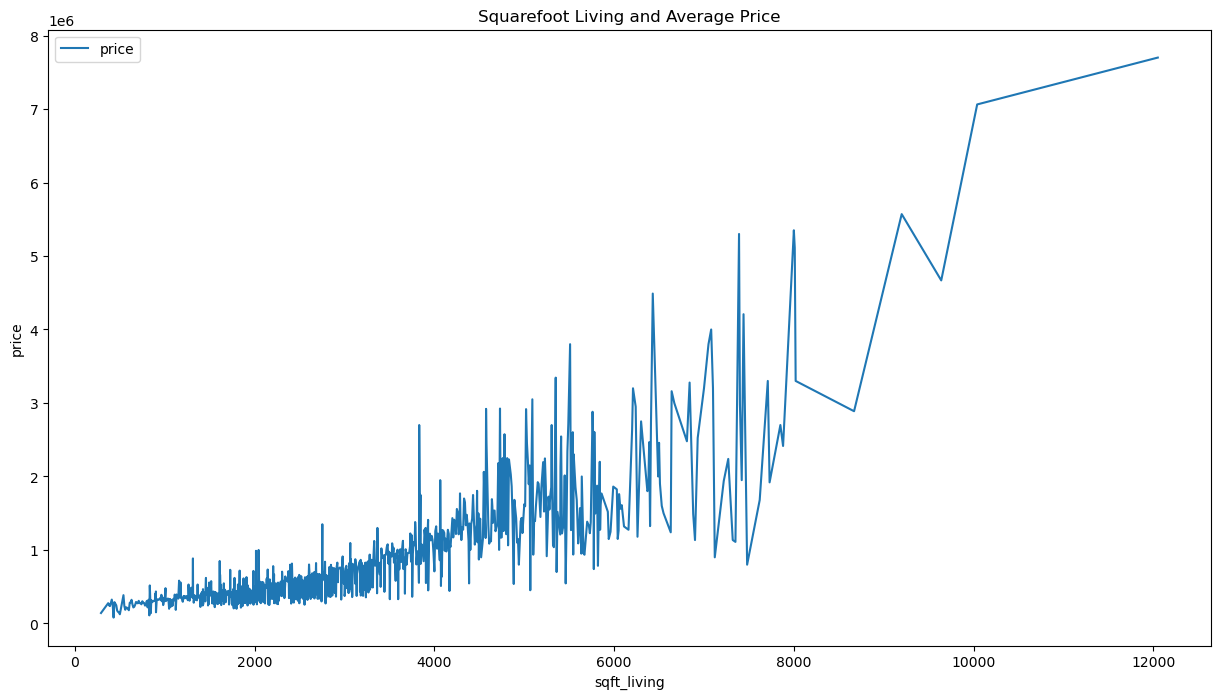

In [68]:
df_2=df.groupby("sqft_living", as_index = True)[["price"]].mean()
df_2.plot(figsize= (15,8))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Squarefoot Living and Average Price')
plt.show()

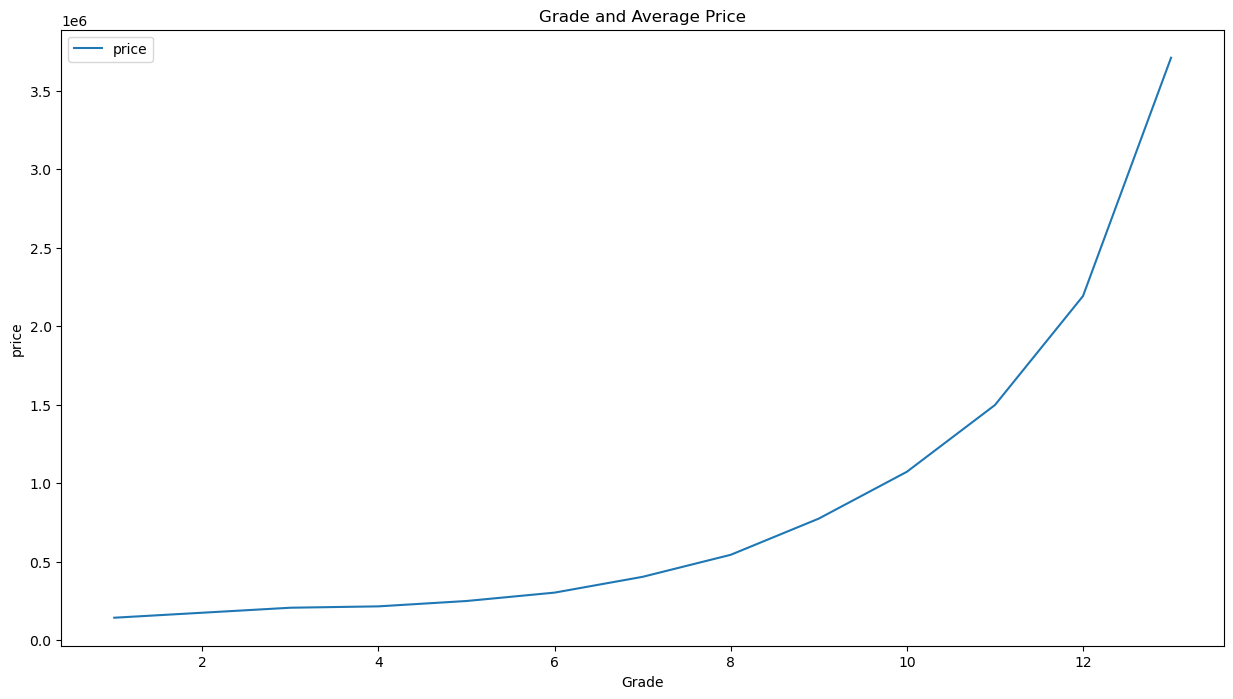

In [69]:
df_2=df.groupby("grade", as_index = True)[["price"]].mean()
df_2.plot(figsize= (15,8))
plt.xlabel('Grade')
plt.ylabel('price')
plt.title('Grade and Average Price')
plt.show()

In [26]:
df_2

,sqft_living,price
0,290.0,142000.0
1,370.0,276000.0
2,380.0,245000.0
3,384.0,265000.0
4,390.0,236500.0
...,...,...
1009,8670.0,2888000.0
1010,9200.0,5570000.0
1011,9640.0,4668000.0
1012,10040.0,7062500.0


In [71]:
groupby_year = round(df.groupby(['year',"month"])[['price']].mean(),2)


In [72]:
groupby_year

price
year month           
2014 5      548080.28
     6      558002.20
     7      544788.76
     8      536445.28
     9      529253.82
     10     539026.97
     11     521961.01
     12     524461.87
2015 1      525870.89
     2      507851.37
     3      543977.19
     4      561837.77
     5      558126.81

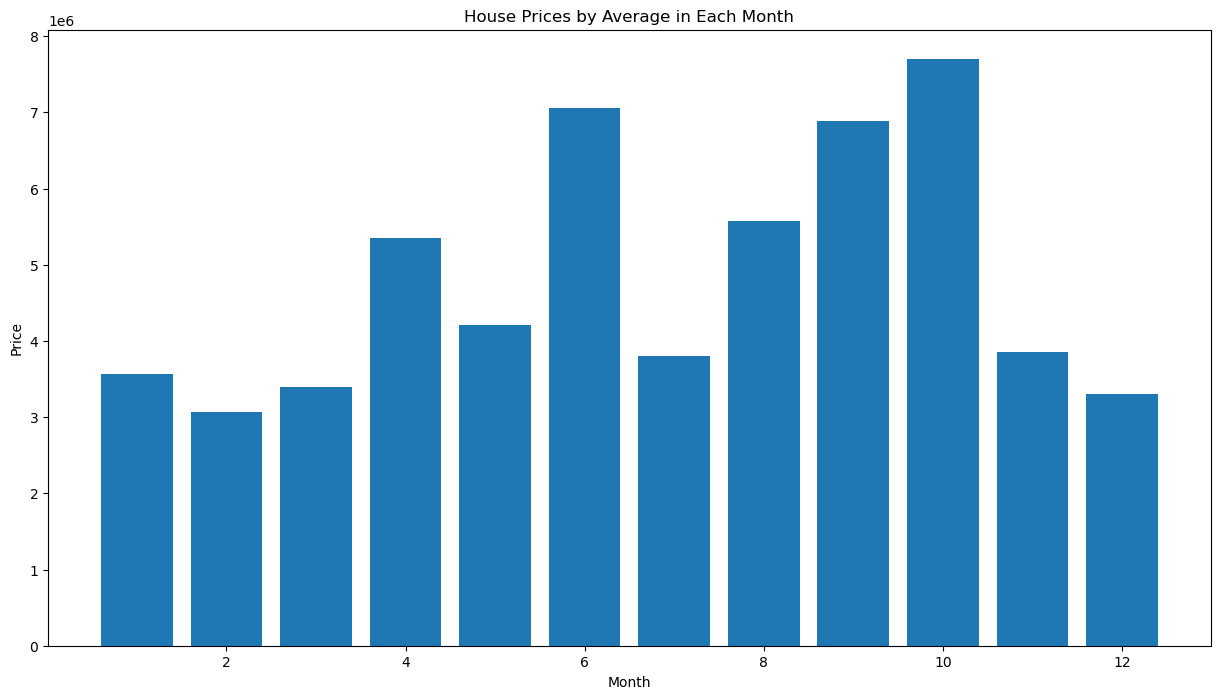

In [74]:
bar_df = df.groupby(['year',"month"],as_index = False)[['price']].mean()
fig = plt.figure(figsize = (15,8))
plt.bar(df['month'], df['price'])
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("House Prices by Average in Each Month")
plt.show()

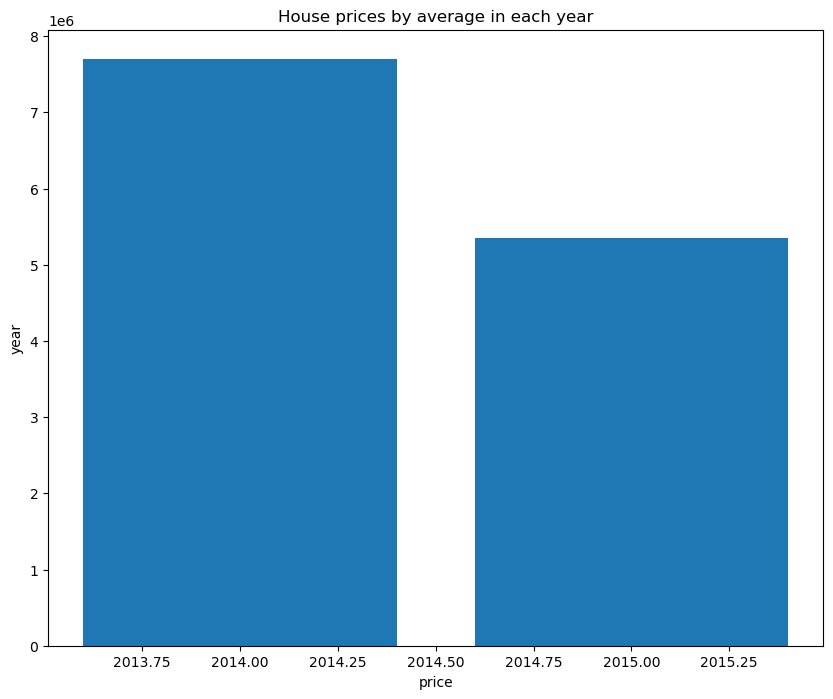

In [80]:
bar_df = df.groupby(['year',"month"],as_index = True)[['price']].mean()
fig = plt.figure(figsize = (10,8))
plt.bar(df['year'],df['price'])
plt.xlabel("price")
plt.ylabel("year")
plt.title("House prices by average in each year")
plt.show()

## Reduce redundant data and perform need-based discretization

## Building a correlation matrix

In [31]:
matrix=df.corr()
matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
id,1.000000,-0.016762,0.004616,0.002101,-0.011529,-0.130281,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708
price,-0.016762,1.000000,0.302493,0.515365,0.681527,0.086530,0.256794,0.266369,0.397293,0.036362,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.004616,0.302493,1.000000,0.487280,0.549054,0.027174,0.172168,-0.005045,0.079782,0.028137,...,0.291689,0.150364,0.019269,-0.149544,-0.008874,0.126537,0.381110,0.024089,-0.009762,0.000723
bathrooms,0.002101,0.515365,0.487280,1.000000,0.714307,0.083146,0.487859,0.067113,0.181425,-0.123002,...,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509,-0.026293,0.007816
sqft_living,-0.011529,0.681527,0.549054,0.714307,1.000000,0.159695,0.345290,0.105203,0.276528,-0.057751,...,0.420720,0.310977,0.055857,-0.193794,0.049893,0.232981,0.736945,0.175089,-0.025891,0.008989
sqft_lot,-0.130281,0.086530,0.027174,0.083146,0.159695,1.000000,-0.005718,0.020783,0.073535,-0.008757,...,0.015346,0.050494,0.008588,-0.127739,-0.085286,0.223731,0.142063,0.717635,0.003033,0.001029
floors,0.018525,0.256794,0.172168,0.487859,0.345290,-0.005718,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,-0.002721,0.266369,-0.005045,0.067113,0.105203,0.020783,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.011592,0.397293,0.079782,0.181425,0.276528,0.073535,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,-0.023783,0.036362,0.028137,-0.123002,-0.057751,-0.008757,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978


In [32]:
df['price'].corr(df['sqft_above'])


         

0.6055672983560776

## Dropping extra column

In [33]:
dropped_df=df.drop(['id','long','yr_renovated','yr_built'], axis=1)
dropped_df.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,98178,47.5112,1340,5650,2014,10
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,98125,47.7210,1690,7639,2014,12
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,98028,47.7379,2720,8062,2015,2
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,98136,47.5208,1360,5000,2014,12
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,98074,47.6168,1800,7503,2015,2


## Reasoning for dropping certain variables:
We decided to drop id, long, year_built, and yr_renovated because they had either a weak or non_exisiting correlation with our dependent variable (price).

# Data Analysis and Visualization
## Identify categorical, ordinal, and numerical variables within the data


## Data Types
#### id=nominal
#### date=ordinal
#### price=continuous
#### bedrooms=nominal
#### bathrooms=discrete
#### sqft_living=continuous
#### sqft_lot=continuous
#### floors=discrete
#### condition=ordinal
#### grade=ordinal
#### yr_built=ordinal
#### zipcode=ordinal

## Provide measures of centrality and distribution with visualizations


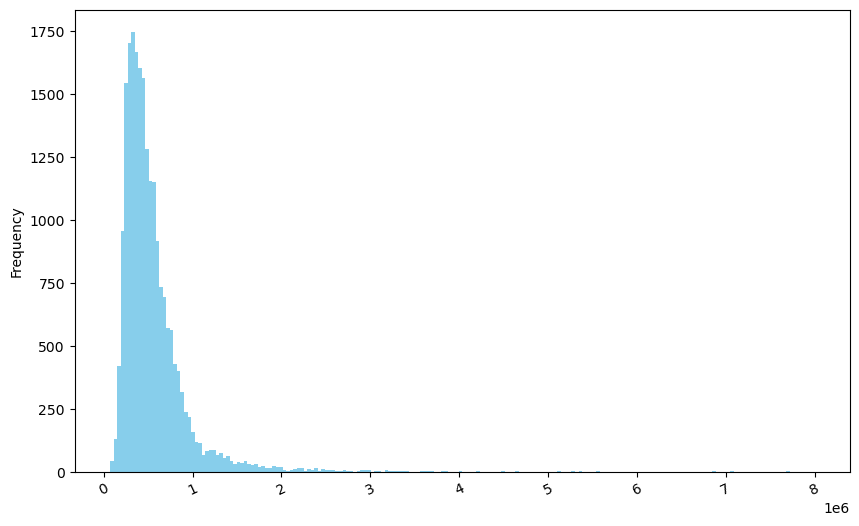

<Figure size 1000x1000 with 0 Axes>

In [84]:
df['price'].plot(kind='hist', range=[70000, 8000000], color='skyblue', figsize=(10, 6), bins=200, rot=25)
figure = plt.figure(figsize = (10,10))
plt.xlabel = ['Price']
plt.ylabel = ['Frequency']
plt.titel= ['Price']
plt.show()

### As seen in the above graph, price is right skewed, as all the oulighers are on the right side, and the highest price is in the 7 million range.

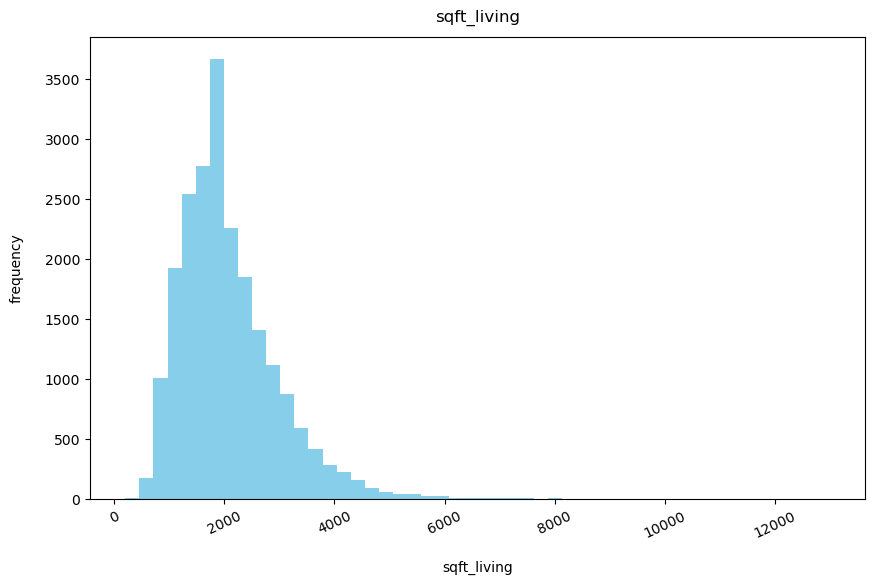

In [35]:
df['sqft_living'].plot(kind='hist', range=[200, 13000], color='skyblue', figsize=(10, 6), bins=50, rot=25)
plt.xlabel("sqft_living", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("sqft_living", y=1.015);

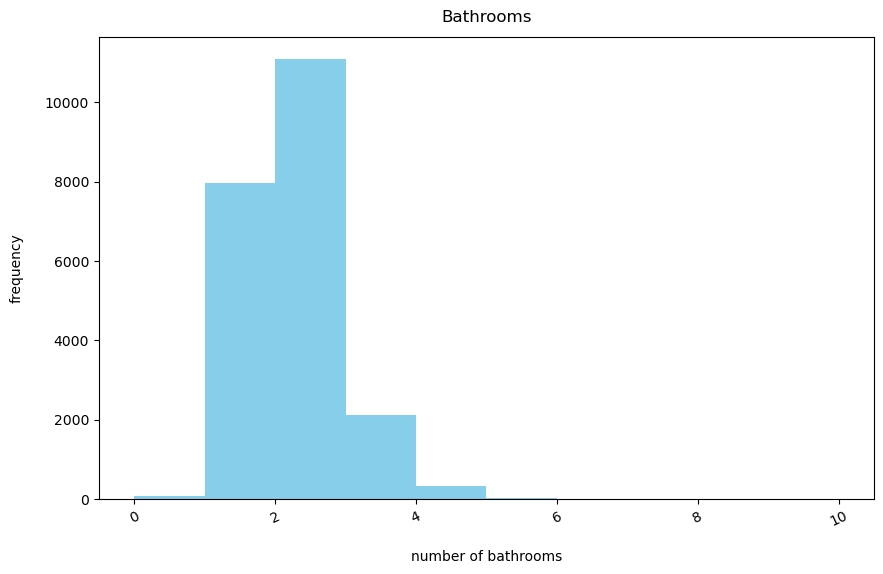

In [36]:
df['bathrooms'].plot(kind='hist', range=[0, 10], color='skyblue', figsize=(10, 6), bins=10, rot=25)
plt.xlabel("number of bathrooms", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Bathrooms", y=1.015);

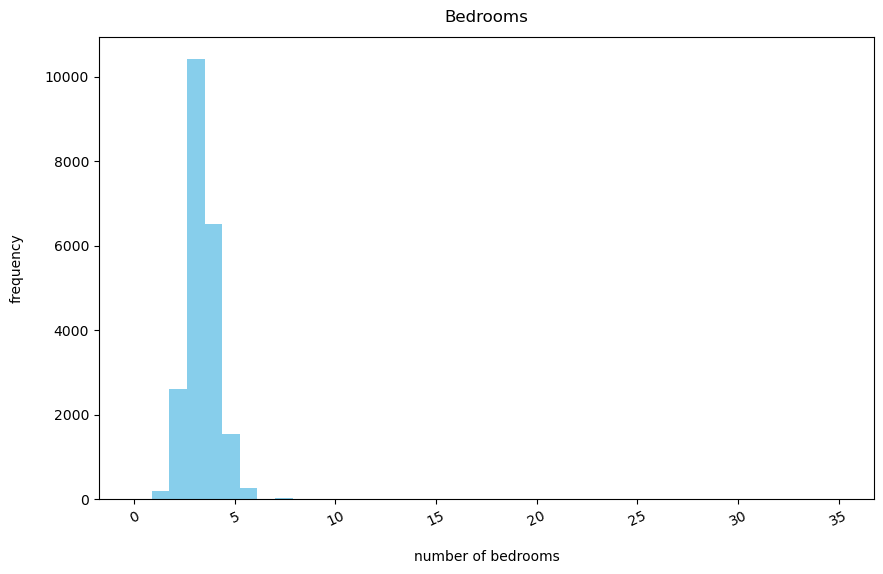

In [37]:
df['bedrooms'].plot(kind='hist', range=[0, 35], color='skyblue', figsize=(10, 6), bins=40, rot=25)
plt.xlabel("number of bedrooms", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.title("Bedrooms", y=1.015);

## Diagnose for correlations between variables and determine independent and dependent variables

<AxesSubplot:>

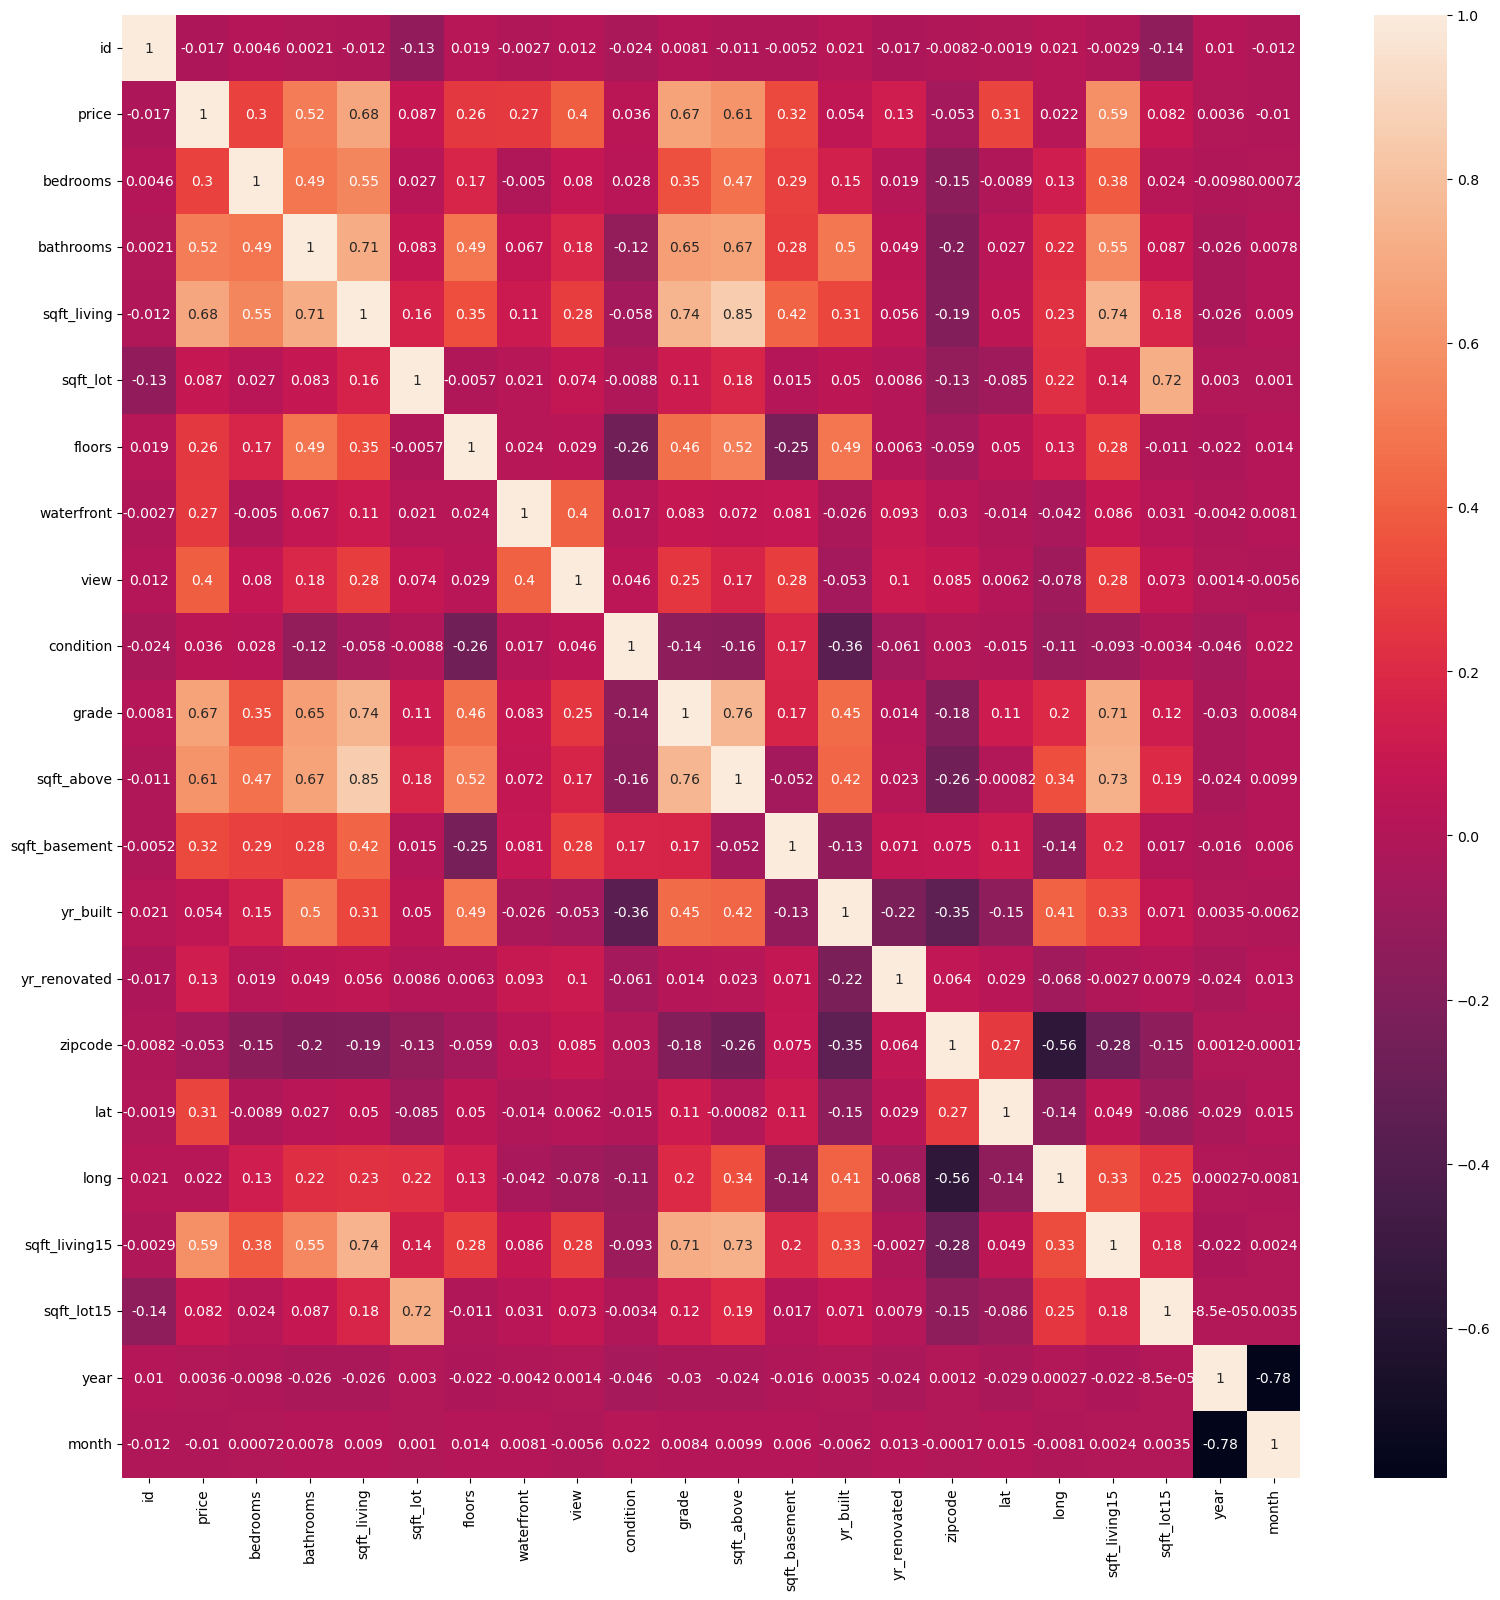

In [38]:
fig, ax = plt.subplots(figsize=(19,19)) 
sns.heatmap(matrix, xticklabels=matrix.columns, yticklabels=matrix.columns, annot=True, ax = ax )# plot the heatmap

### Our dependent variable in this data set is price
### The rest of the variables such as sqft_living, bathrooms, sqft_lot, bedrooms, and etc, are our independent variables.

### There is a strong or moderate correlation between price and grade, sqft_above, sqft_living, and bathrooms.

## Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest


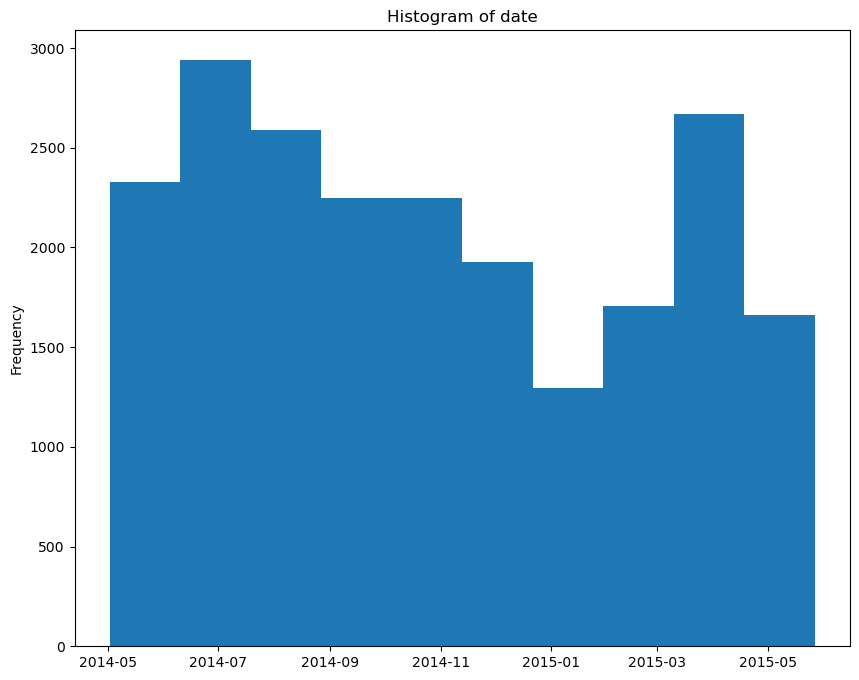

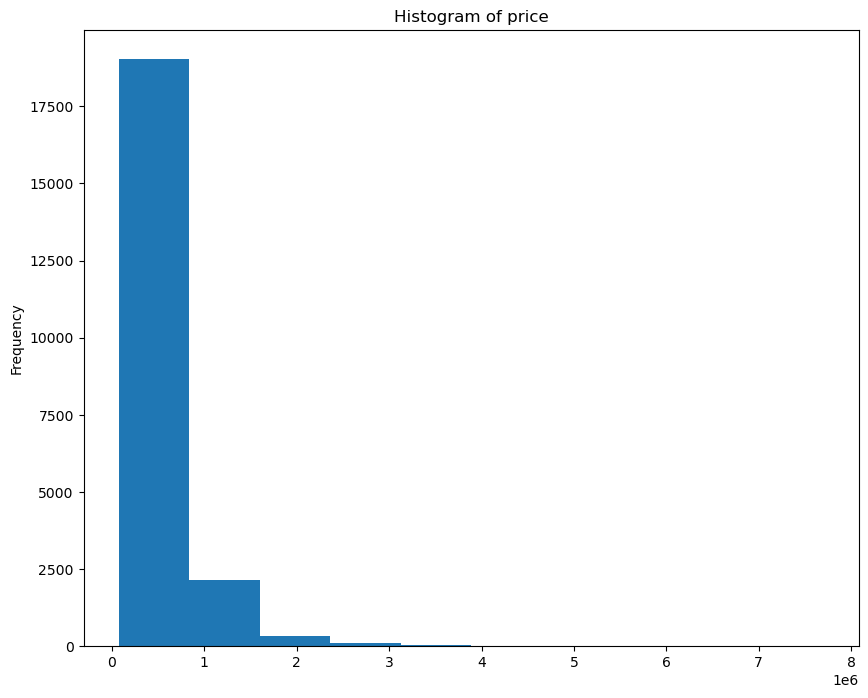

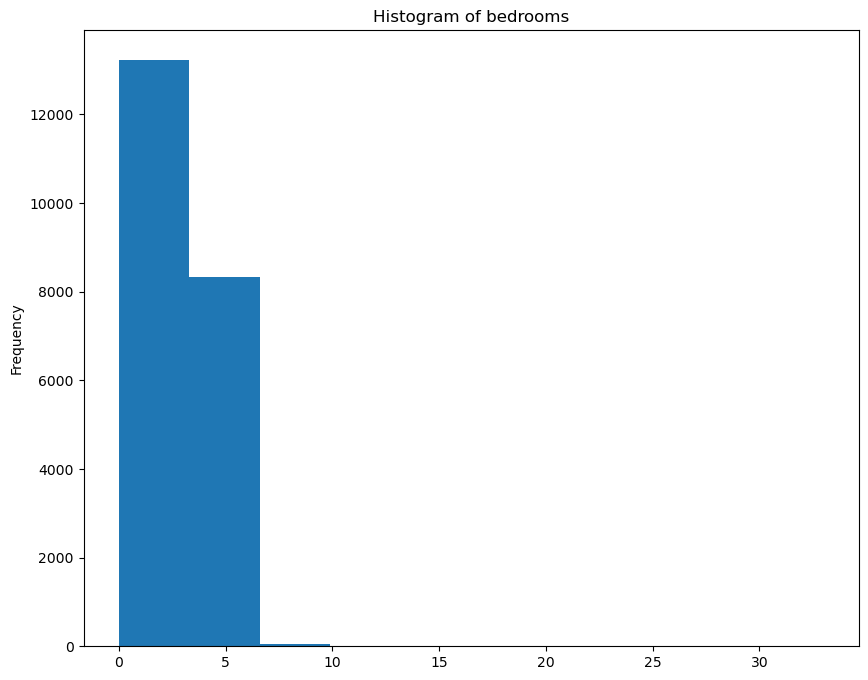

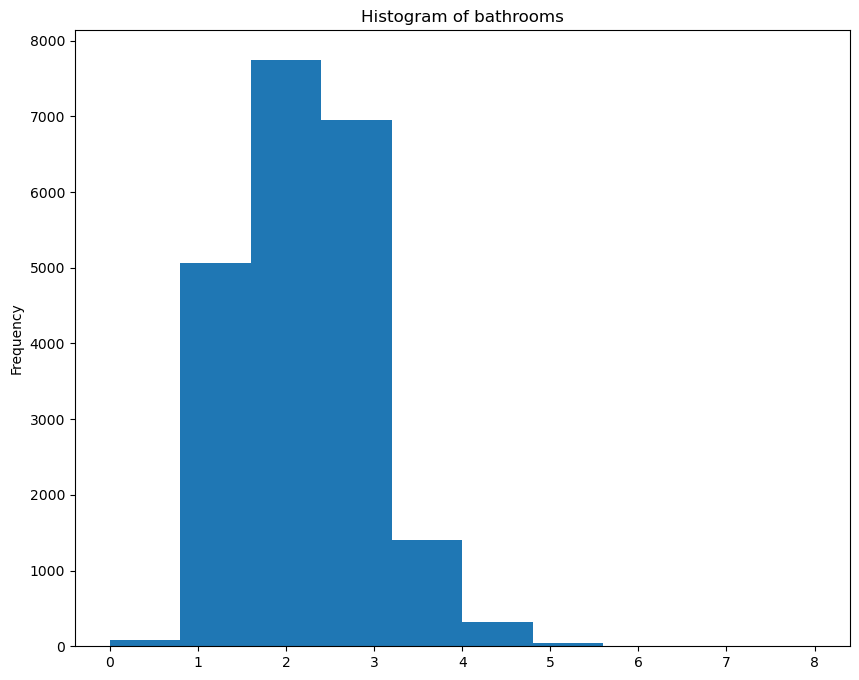

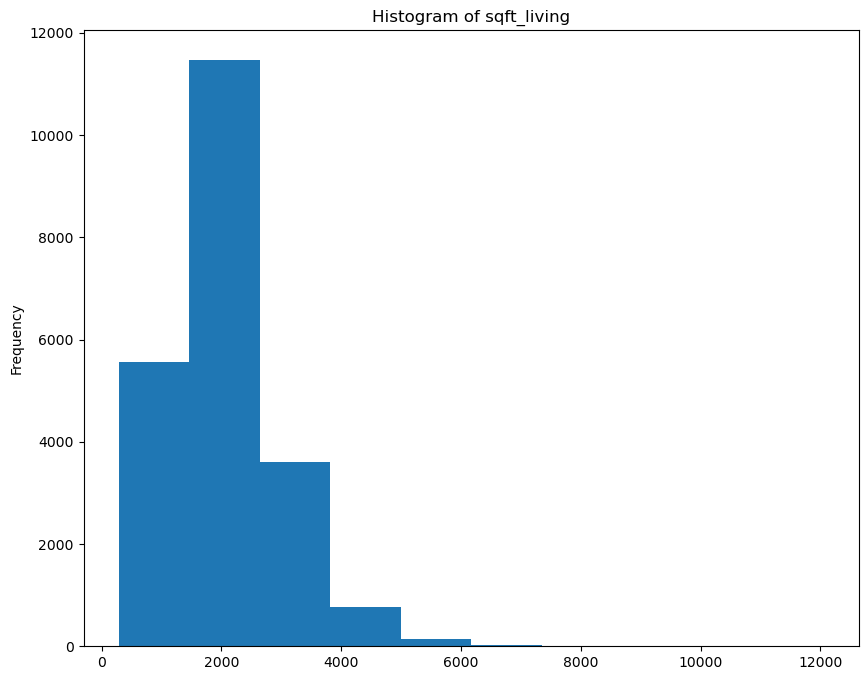

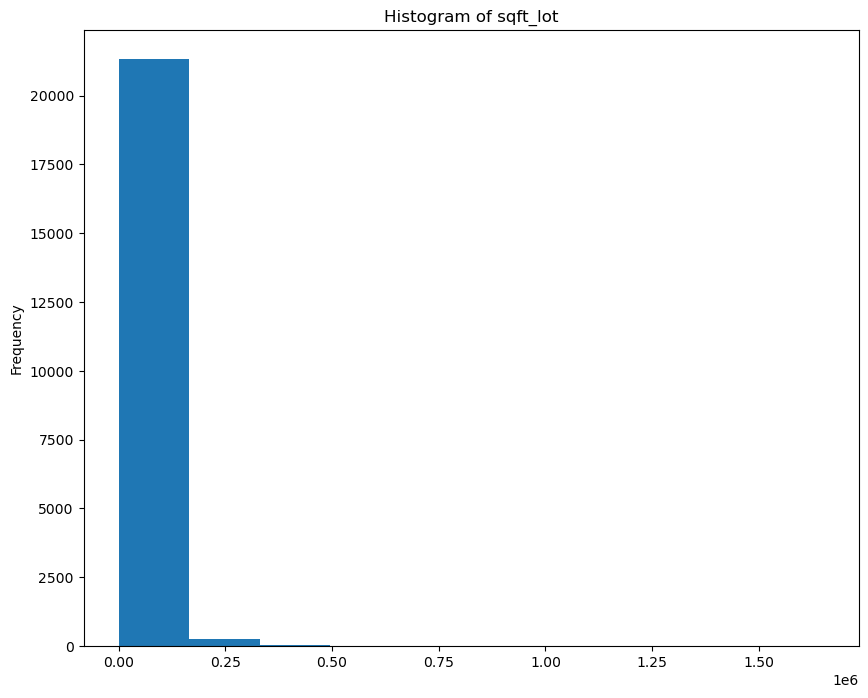

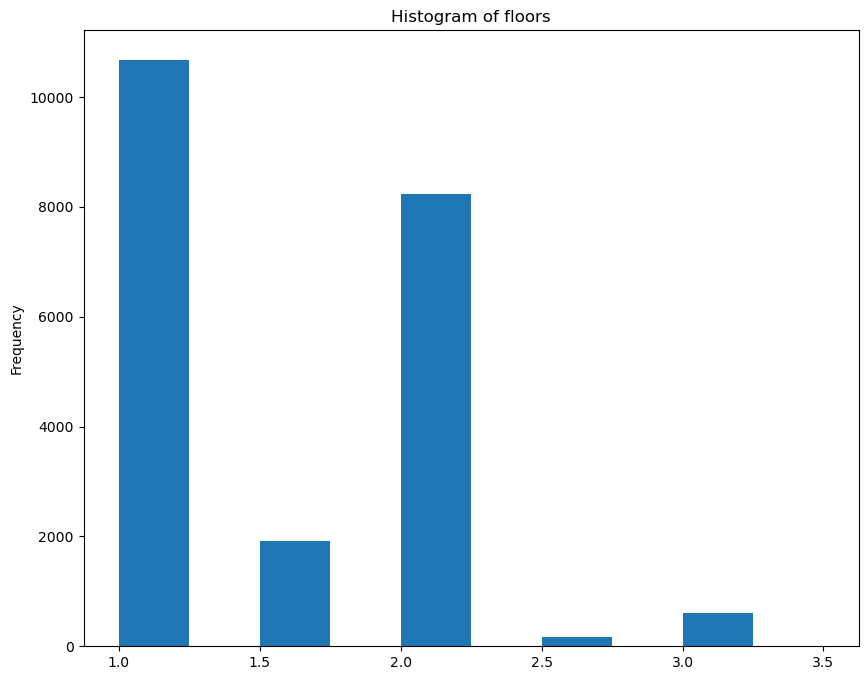

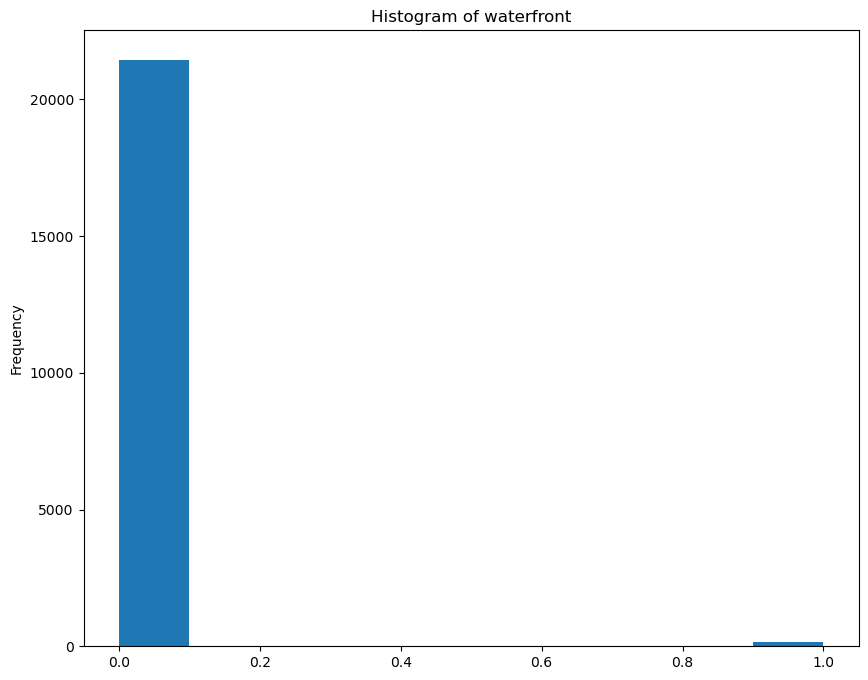

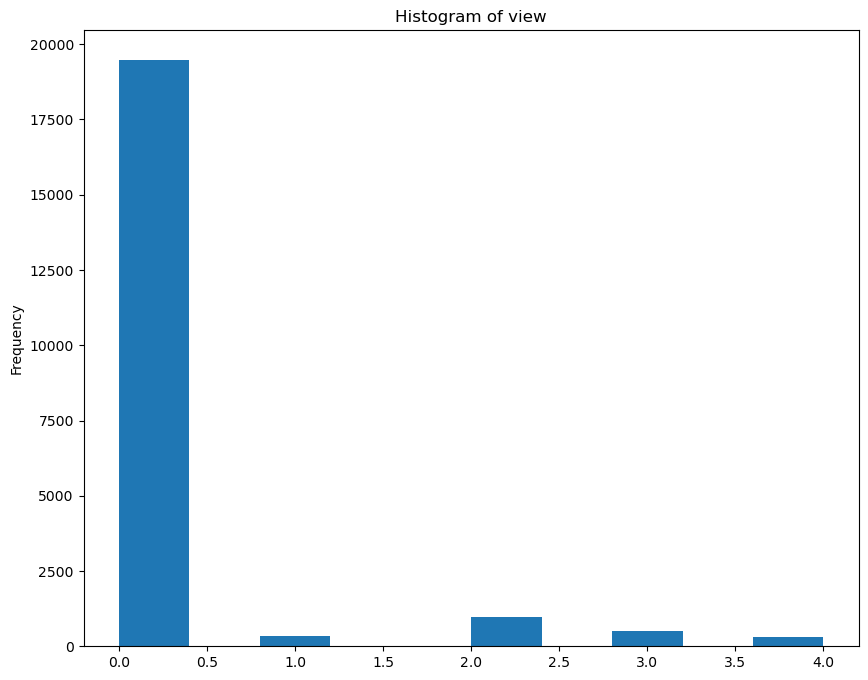

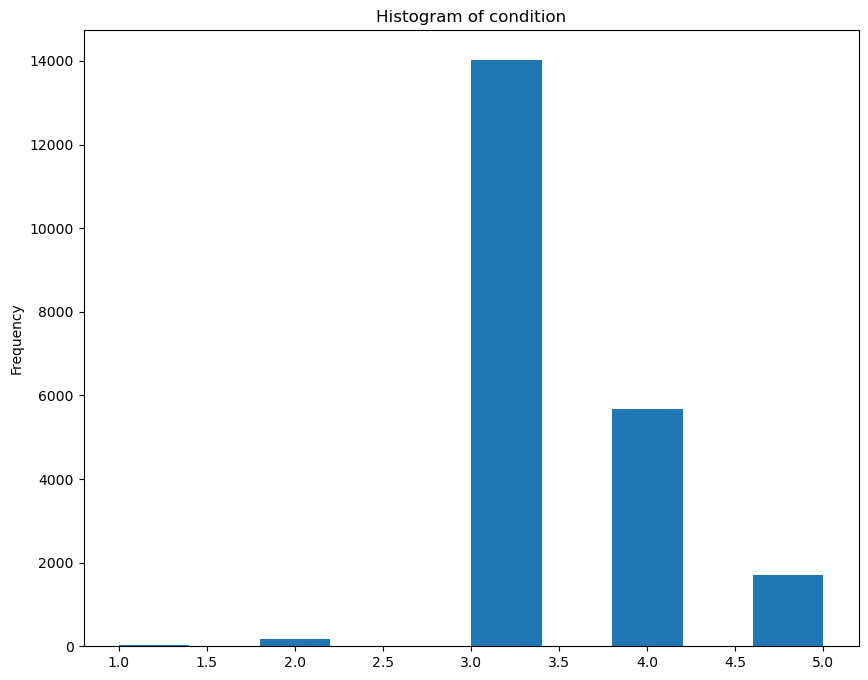

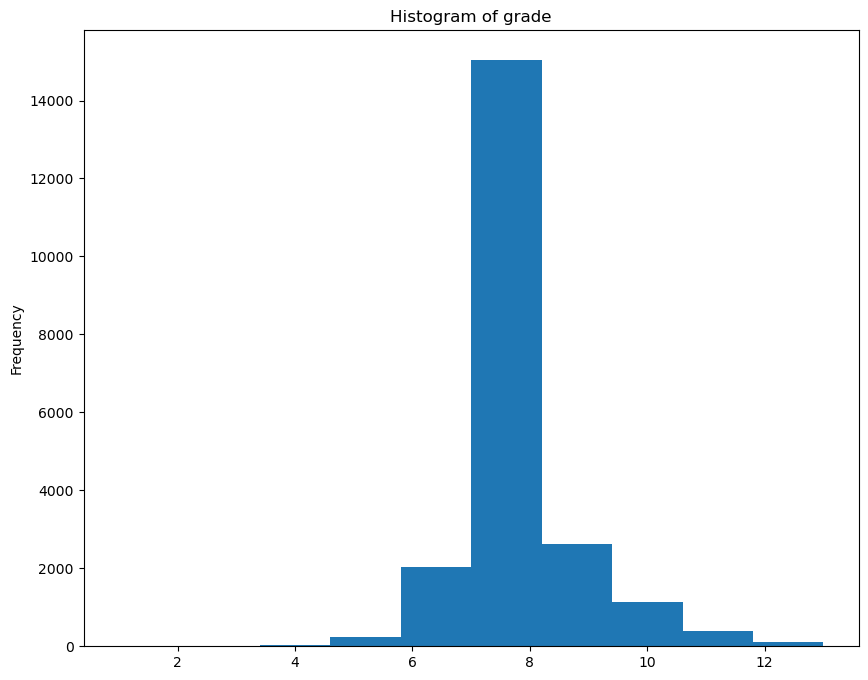

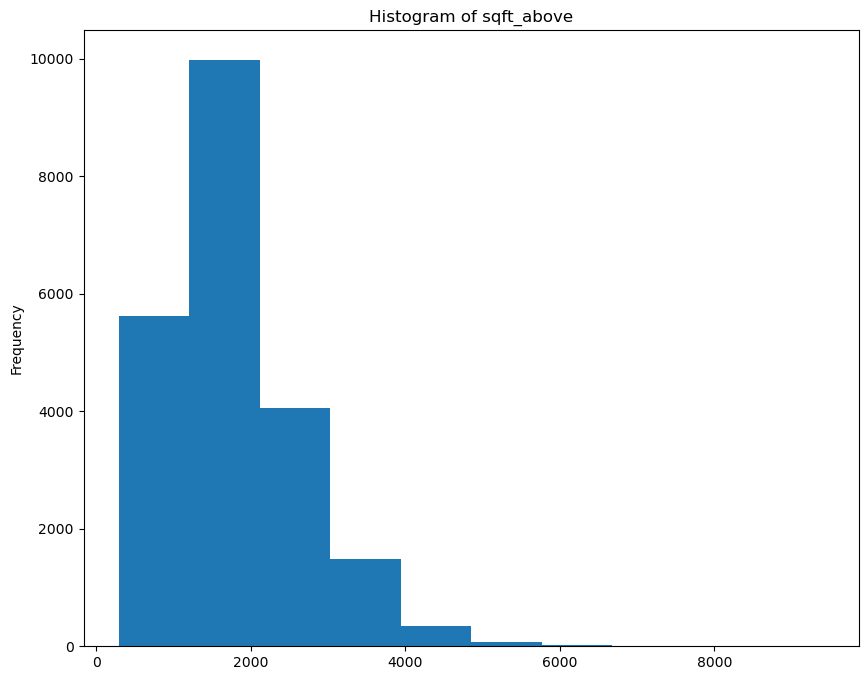

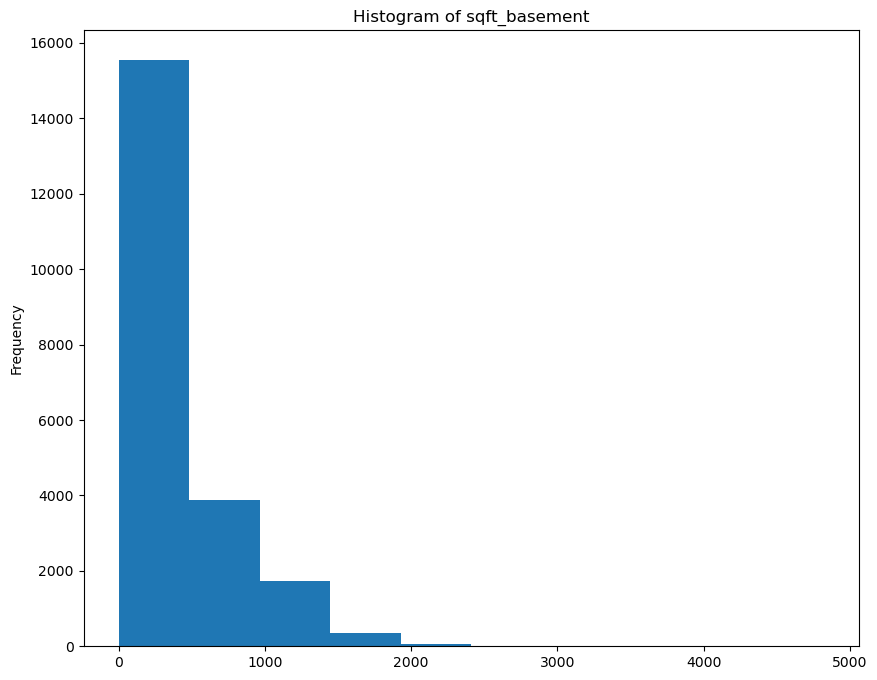

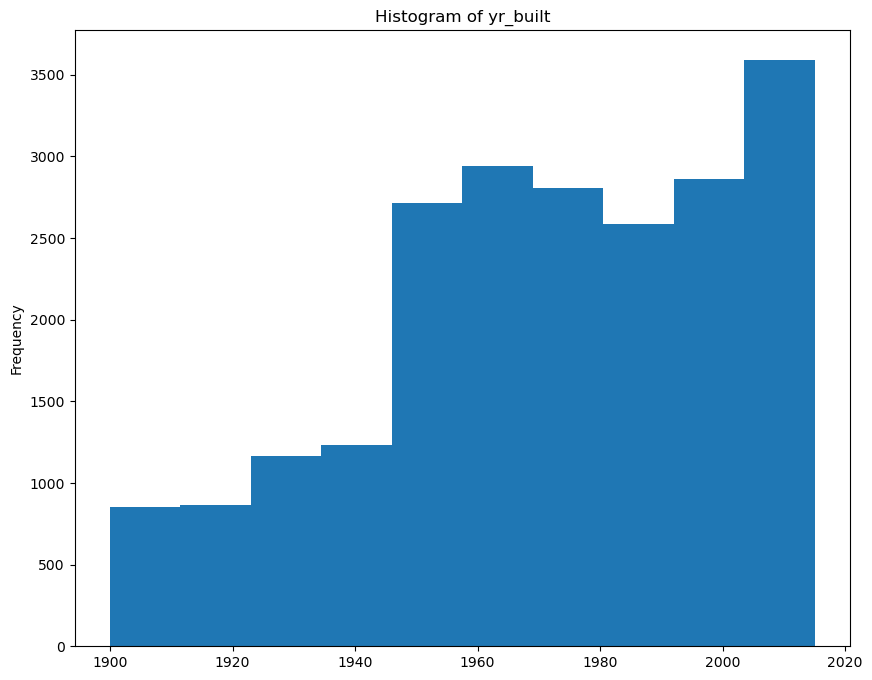

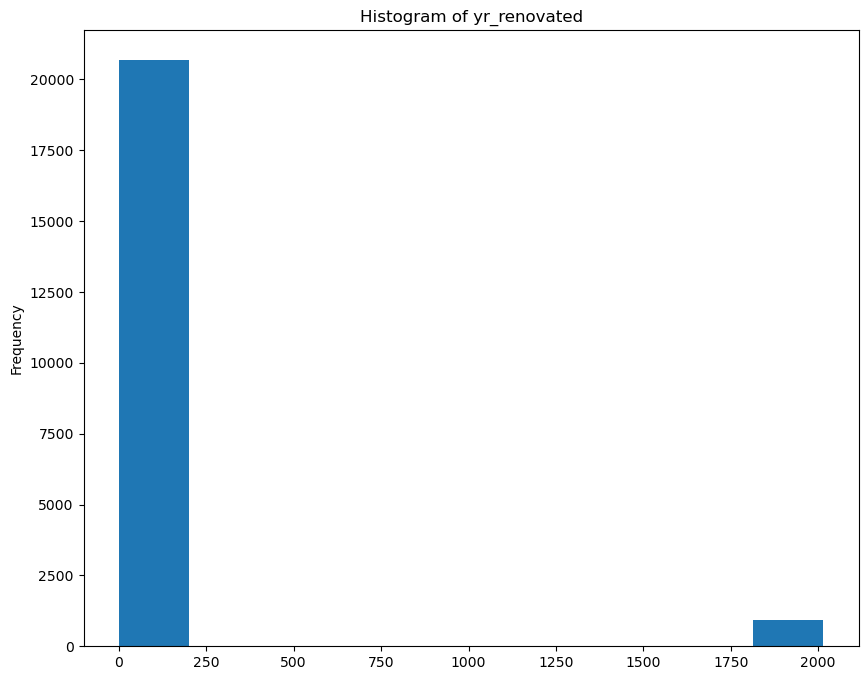

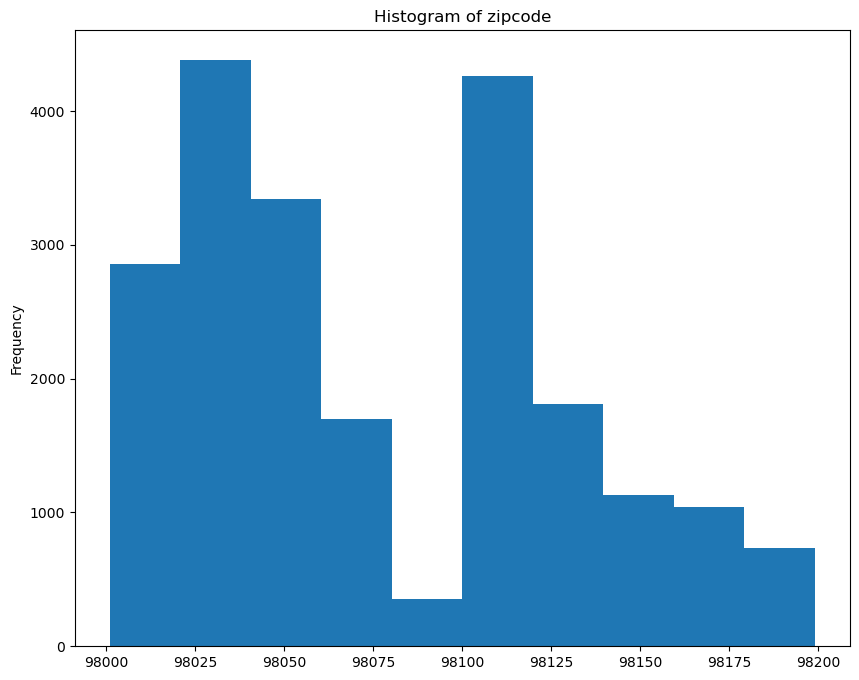

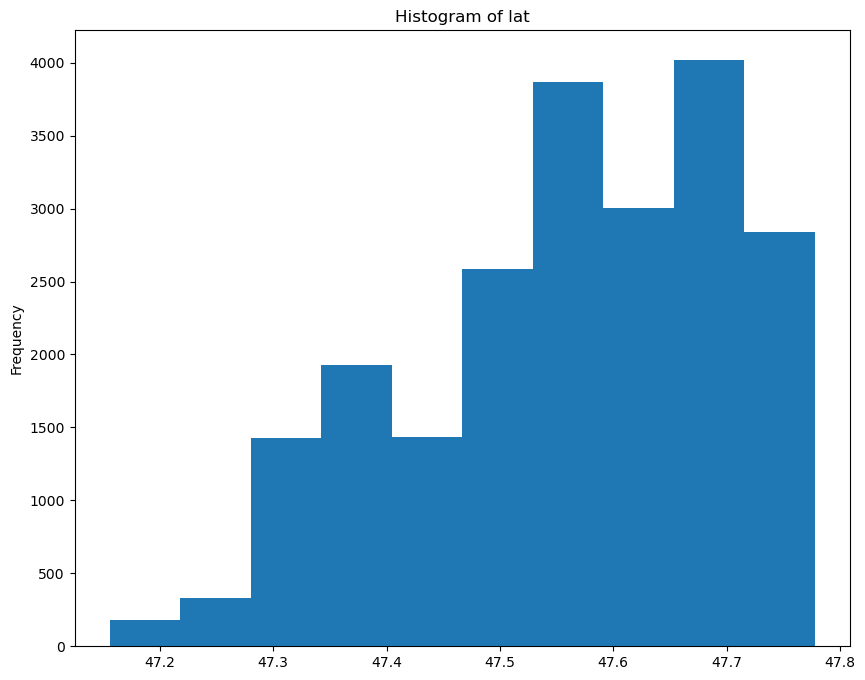

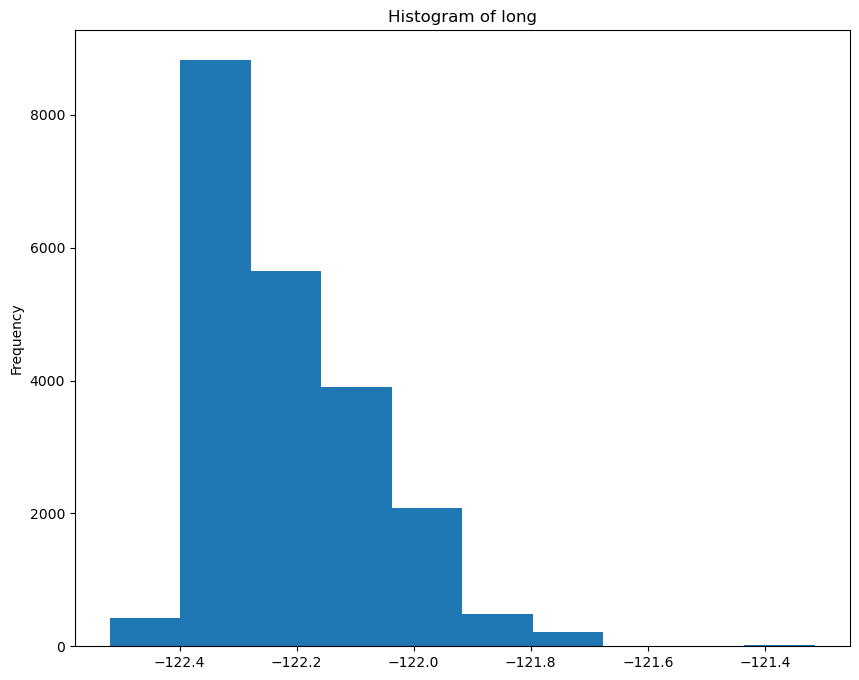

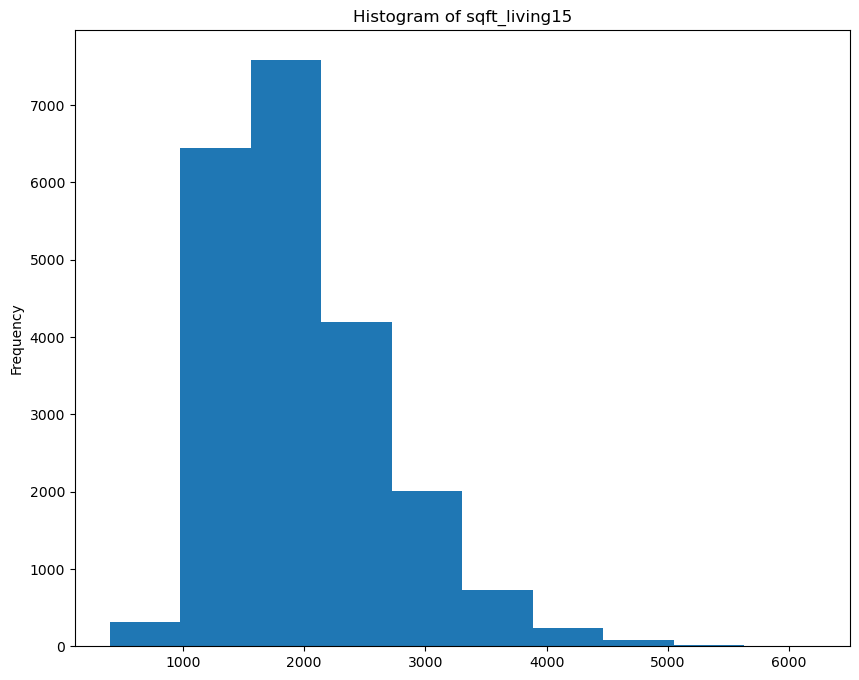

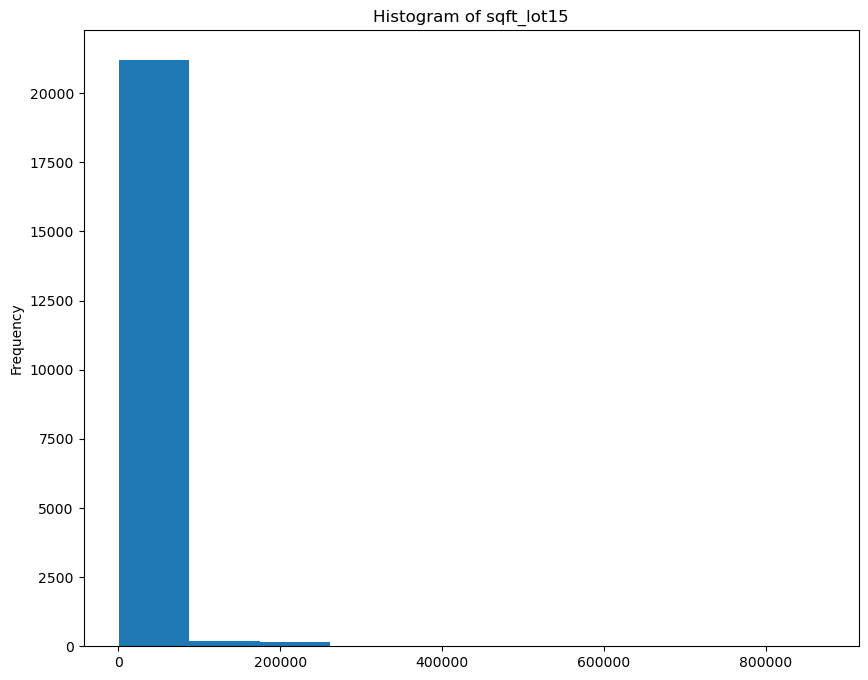

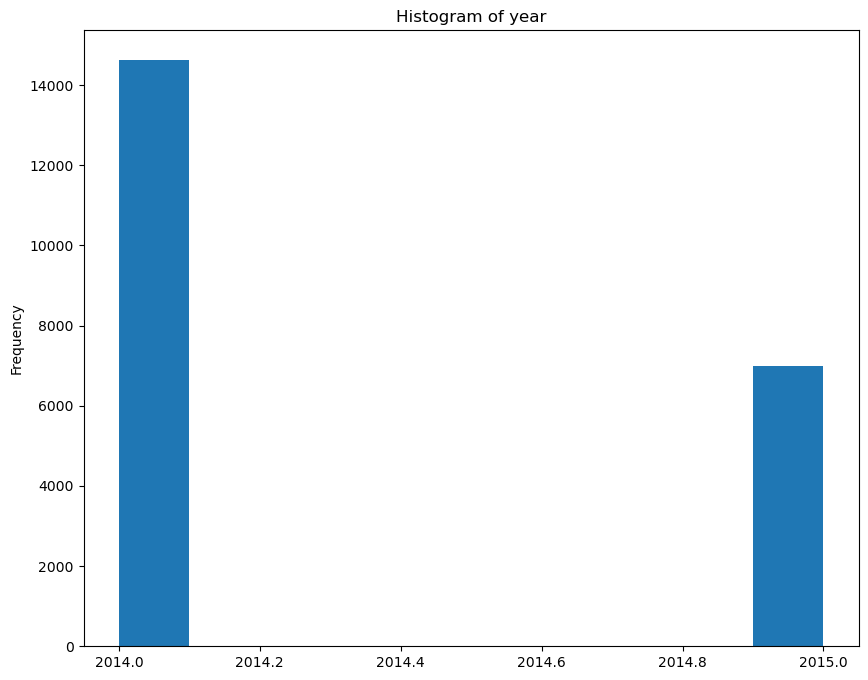

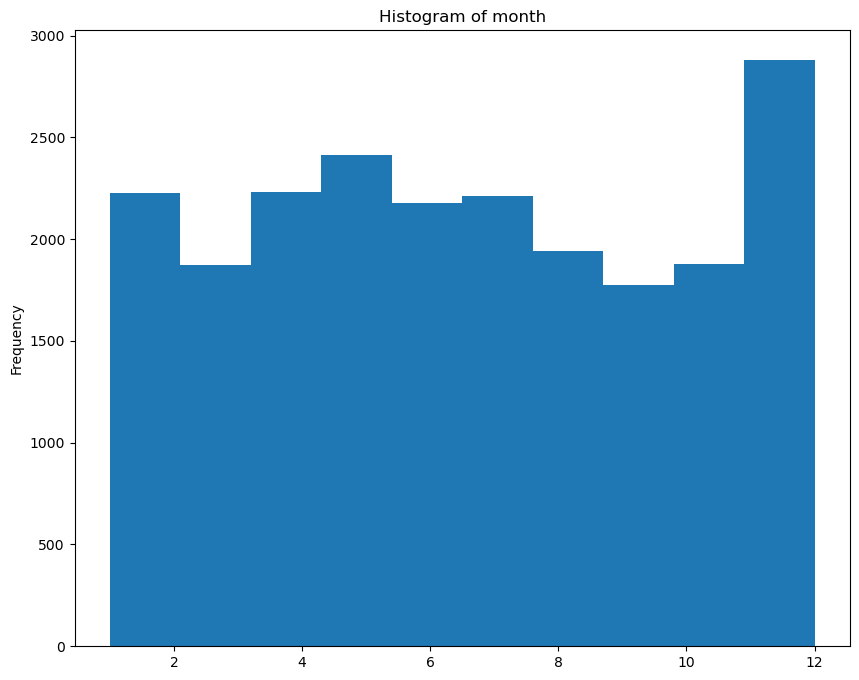

In [39]:
for column in df.columns[1:]:
    plt.figure(figsize = (10,8))
    plt.hist(df[column])
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

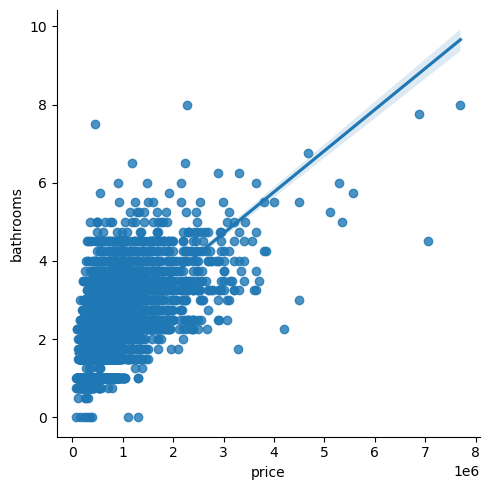

In [40]:
sns.lmplot(data=df, x="price", y="bathrooms")


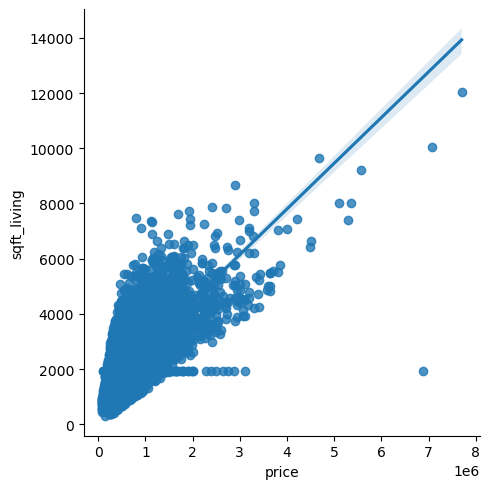

In [41]:
sns.lmplot(data=df, x="price", y="sqft_living")


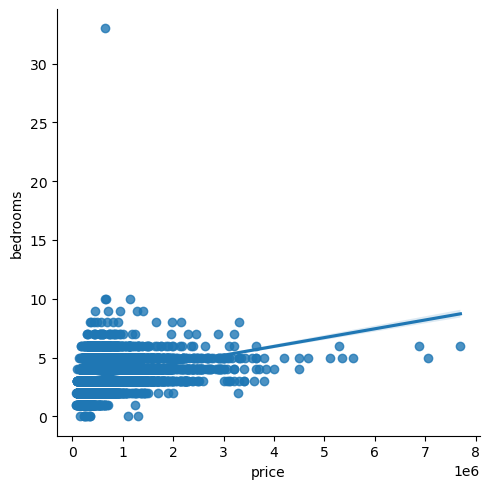

In [42]:
sns.lmplot(data=df, x="price", y="bedrooms")


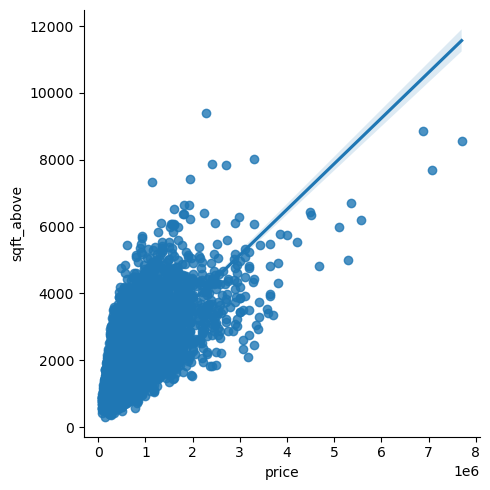

In [43]:
sns.lmplot(data=df, x="price", y="sqft_above")


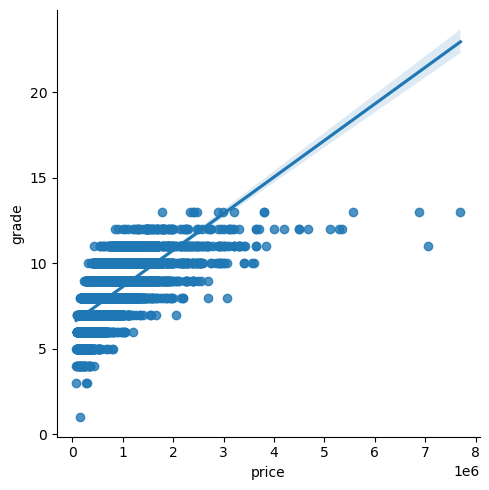

In [44]:
sns.lmplot(data=df, x="price", y="grade")


# Data Analytics

## Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
### In this data set, we are dealing with a supervised learning method, using labaeled data to predict outcome for our model.

### Our dependent variable is price, and the rest of the variables such as bedrooms, bathrooms, sqft_living, and etc are all independent variables within our model.

In [45]:
model_df= df[['price',"bedrooms",'bathrooms','lat',"sqft_living",'sqft_above','grade','sqft_living15','view','sqft_basement','floors','waterfront']]
model_df.head()

,price,bedrooms,bathrooms,lat,sqft_living,sqft_above,grade,sqft_living15,view,sqft_basement,floors,waterfront
0,221900.0,3.0,1.00,47.5112,1180.0,1180,7,1340,0,0,1.0,0
1,538000.0,3.0,2.25,47.7210,2570.0,2170,7,1690,0,400,2.0,0
2,180000.0,2.0,1.00,47.7379,770.0,770,6,2720,0,0,1.0,0
3,604000.0,4.0,3.00,47.5208,1960.0,1050,7,1360,0,910,1.0,0
4,510000.0,3.0,2.00,47.6168,1680.0,1680,8,1800,0,0,1.0,0


## Train, test, and provide accuracy and evaluation metrics for model results


In [46]:
X = model_df[["bedrooms",'bathrooms','lat',"sqft_living",'sqft_above','grade','sqft_living15','view','sqft_basement','floors','waterfront']] ## X usually means our input variables (or independent variables)
y = model_df["price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     3765.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:15:20   Log-Likelihood:            -2.9603e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21601   BIC:                         5.922e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.246e+07   5.12e+05    -63.385      0.000   -3.35e+07   -3.15e+07
bedrooms      -2.391e+04   2005.654    -11.923      0.000   -2.78e+04      -2e+04
bathrooms     -1391.6861   3184.041     -0.437      0.662   -7632.642    4849.269
lat            6.743e+05   1.08e+04     62.433      0.000    6.53e+05    6.95e+05
sqft_living      -4.0927      6.734     -0.608      0.543     -17.292       9.107
sqft_above      194.9753      7.266     26.834      0.000     180.734     209.217
grade          8.245e+04   2218.473     37.165      0.000    7.81e+04    8.68e+04
sqft_living15     4.4288      3.560      1.244      0.213      -2.548      11.406
view           6.748e+04   2238.137     30.150      0.000    6.31e+04    7.19e+04
sqft_basement   193.4574      7.695     25.142      0.000     178.375     208.540
floors        -3.039e+04   3641.021     -8.345      0.000   -3.75e+04   -2.32e+04
waterfront      6.04e+05   1.85e+04     32.626      0.000    5.68e+05     6.4e+05
==============================================================================
Omnibus:                    18064.423   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1555597.697
Skew:                           3.520   Prob(JB):                         0.00
Kurtosis:                      43.961   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking the Variance Inflation Factor and Dealing with Multicollinearity:

In [47]:
X = model_df[list(model_df.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor (X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)


,VIF,Column
6,141.406925,grade
4,107.911603,sqft_living
5,97.786433,sqft_above
3,85.288853,lat
7,25.538512,sqft_living15
1,22.803387,bedrooms
2,21.156313,bathrooms
9,7.672631,sqft_basement
0,7.484387,price
8,1.366480,view


In [48]:
X = X.drop(['grade', 'sqft_living'], axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,24.961330,sqft_above
5,23.822497,sqft_living15
1,22.469864,bedrooms
3,20.655013,lat
2,20.084595,bathrooms
0,6.984694,price
7,2.551111,sqft_basement
6,1.366459,view


In [49]:
X = model_df[['bathrooms','view','sqft_basement','bedrooms','sqft_living15', 'lat','sqft_above']] ## X usually means our input variables (or independent variables)
y = model_df["price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5019.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:15:21   Log-Likelihood:            -2.9717e+05
No. Observations:               21613   AIC:                         5.944e+05
Df Residuals:                   21605   BIC:                         5.944e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.418e+07   5.34e+05    -64.032      0.000   -3.52e+07   -3.31e+07
bathrooms      1.471e+04   3070.055      4.790      0.000    8688.921    2.07e+04
view           1.007e+05   2169.622     46.409      0.000    9.64e+04    1.05e+05
sqft_basement   222.1959      4.395     50.551      0.000     213.580     230.811
bedrooms      -3.629e+04   2088.222    -17.377      0.000   -4.04e+04   -3.22e+04
sqft_living15    38.5206      3.570     10.790      0.000      31.523      45.518
lat            7.192e+05   1.12e+04     64.088      0.000    6.97e+05    7.41e+05
sqft_above      245.4557      3.591     68.357      0.000     238.418     252.494
==============================================================================
Omnibus:                    17337.691   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178937.166
Skew:                           3.370   Prob(JB):                         0.00
Kurtosis:                      38.549   Cond. No.                     9.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""